In [4]:
%load_ext autoreload
%autoreload 2

## Physics Informed Neural Networks to Approximate Solution of PDEs

In [9]:
from pinn import PINNTrainer
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import torch

# Solve the system of equations using PINNs

System of two linear reaction-convection-diffusion equations

You will have to implement the following
1. initialize the approximate neural network solution
2. implement the functions add interior points, add temporal boundary points,
   and add spatial boundary points; 
3. implement the function apply initial condition;
4. implement the function apply boundary conditions;
5. implement the function compute pde residuals;
6. train the model.









## Set up

In [10]:
kwargs = {
    "alpha_f" :0.05 ,
    "h_f" : 5,
    "T_hot" : 4,
    "u_f" : 1,
    "alpha_s" : 0.08,
    "h_s" : 6,
    "T0" : 1,
}

In [11]:
# Values for number of poitns in each region

n_int = 256
n_sb = 64
n_tb = 64

pinn = PINNTrainer(n_int, n_sb, n_tb, **kwargs)

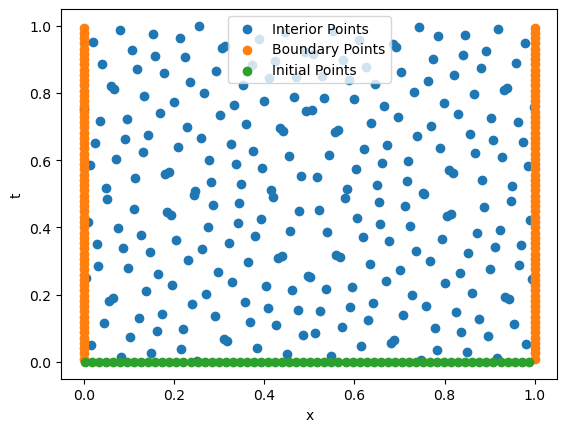

In [12]:
# Plot the input training points.
input_sb_, output_sb_ = pinn.add_spatial_boundary_points()
input_tb_, output_tb_ = pinn.add_temporal_boundary_points()
input_int_, output_int_ = pinn.add_interior_points()

plt.scatter(
    input_int_[:, 1].detach().numpy(),
    input_int_[:, 0].detach().numpy(),
    label="Interior Points")
plt.scatter(
    input_sb_[:, 1].detach().numpy(),
    input_sb_[:, 0].detach().numpy(),
    label="Boundary Points")
plt.scatter(
    input_tb_[:, 1].detach().numpy(),
    input_tb_[:, 0].detach().numpy(),
    label="Initial Points")

plt.xlabel("x")
plt.ylabel("t")
plt.legend()

plt.show()

## Training

In [13]:
%%time

hist = pinn.fit(num_epochs=1, max_iter=10000, verbose=True)

################################  0  ################################
Total loss:  1.6116 | PDE Loss:  0.6053 | Function Loss:  -0.232
Total loss:  1.6069 | PDE Loss:  0.6007 | Function Loss:  -0.2419
Total loss:  1.5859 | PDE Loss:  0.5801 | Function Loss:  -0.2879
Total loss:  1.3505 | PDE Loss:  0.3489 | Function Loss:  -1.0628
Total loss:  1.2104 | PDE Loss:  0.1999 | Function Loss:  -0.4104
Total loss:  1.324 | PDE Loss:  0.1274 | Function Loss:  0.8853
Total loss:  1.1784 | PDE Loss:  0.1739 | Function Loss:  -0.8144
Total loss:  1.144 | PDE Loss:  0.1387 | Function Loss:  -0.7715
Total loss:  1.1358 | PDE Loss:  0.13 | Function Loss:  -0.7483
Total loss:  1.077 | PDE Loss:  0.0647 | Function Loss:  -0.4761
Total loss:  1.0528 | PDE Loss:  0.002 | Function Loss:  0.0959
Total loss:  1.0305 | PDE Loss:  0.0009 | Function Loss:  -0.1499
Total loss:  1.0061 | PDE Loss:  -0.0328 | Function Loss:  -0.0615
Total loss:  0.9979 | PDE Loss:  -0.0719 | Function Loss:  0.1698
Total loss:  0

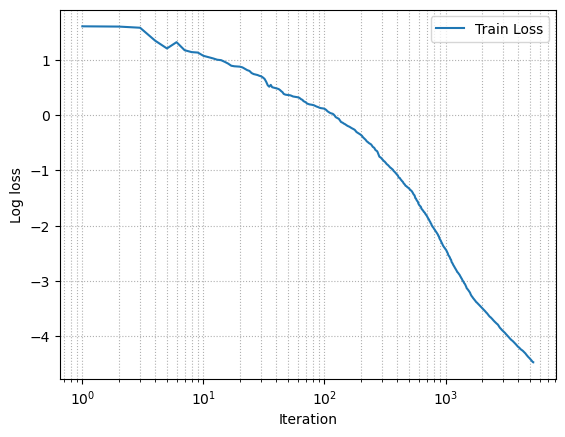

In [14]:
pinn.plot_loss_function(hist)

# Testing on random points

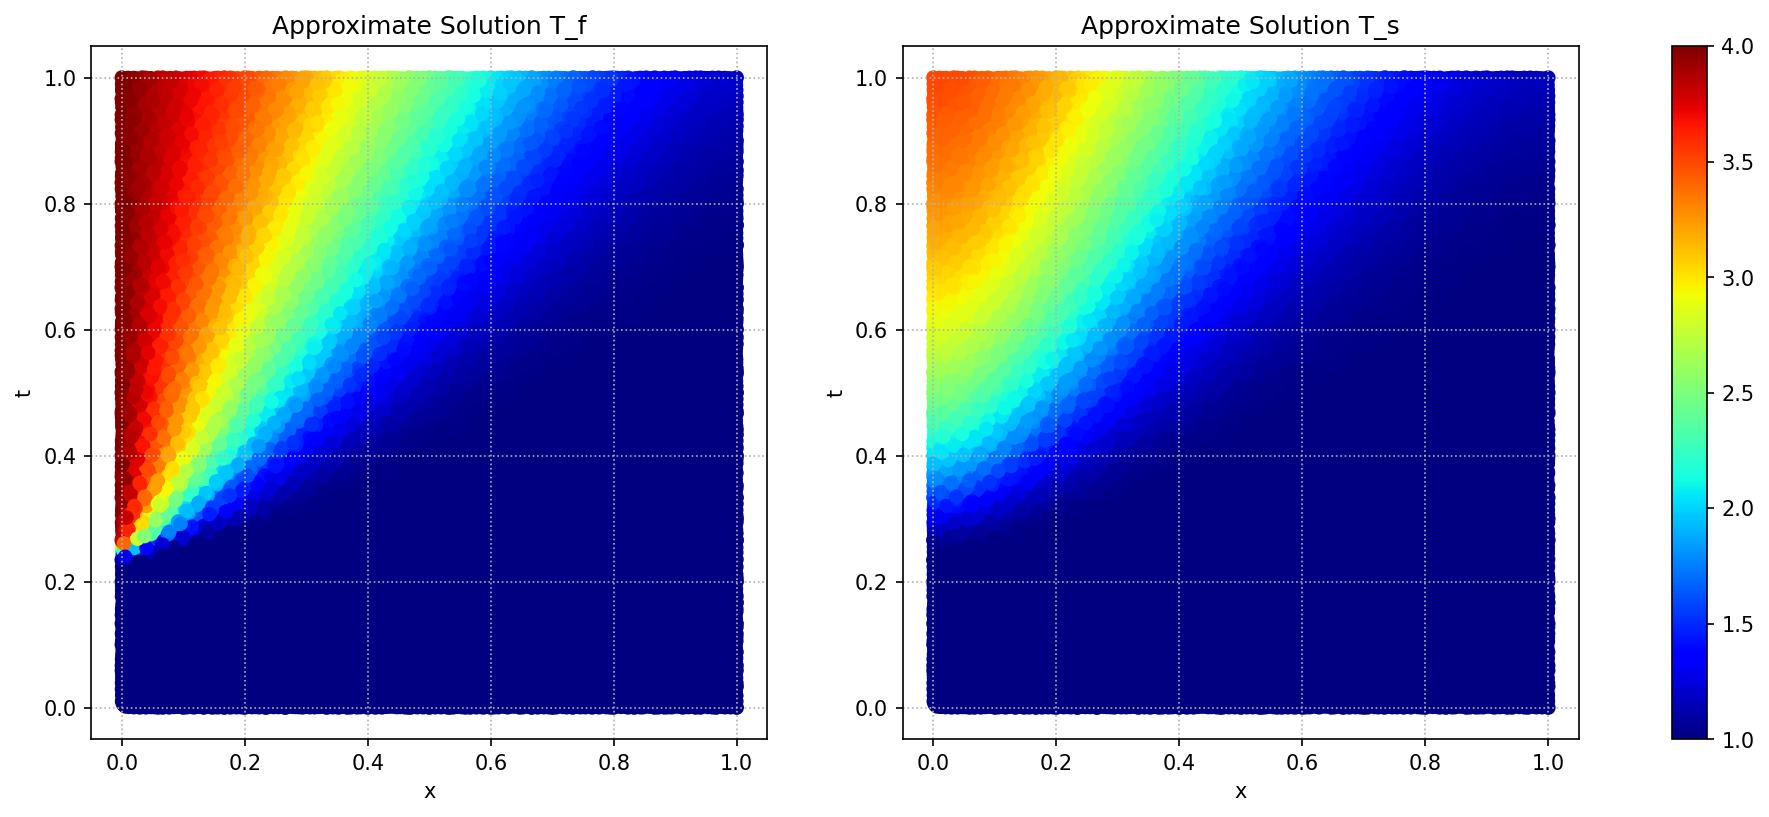

In [15]:
inputs = pinn.soboleng.draw(100000)
outputs = pinn.approximate_solution(inputs)
pinn.plot(inputs, outputs)

# Visualize and save results on given data

In [16]:

def convert_df_to_tensor(df):
    """Function to convert a pandas dataframe to a PyTorch tensor"""
    a = np.vstack(df.values).astype(np.float32)
    return torch.from_numpy(a)

In [ ]:
# Read measurements from data file and return approx solution
data = pd.read_csv('TestingData.csv', header=0)
inputs = convert_df_to_tensor(data)
outputs = pinn.approximate_solution(inputs)

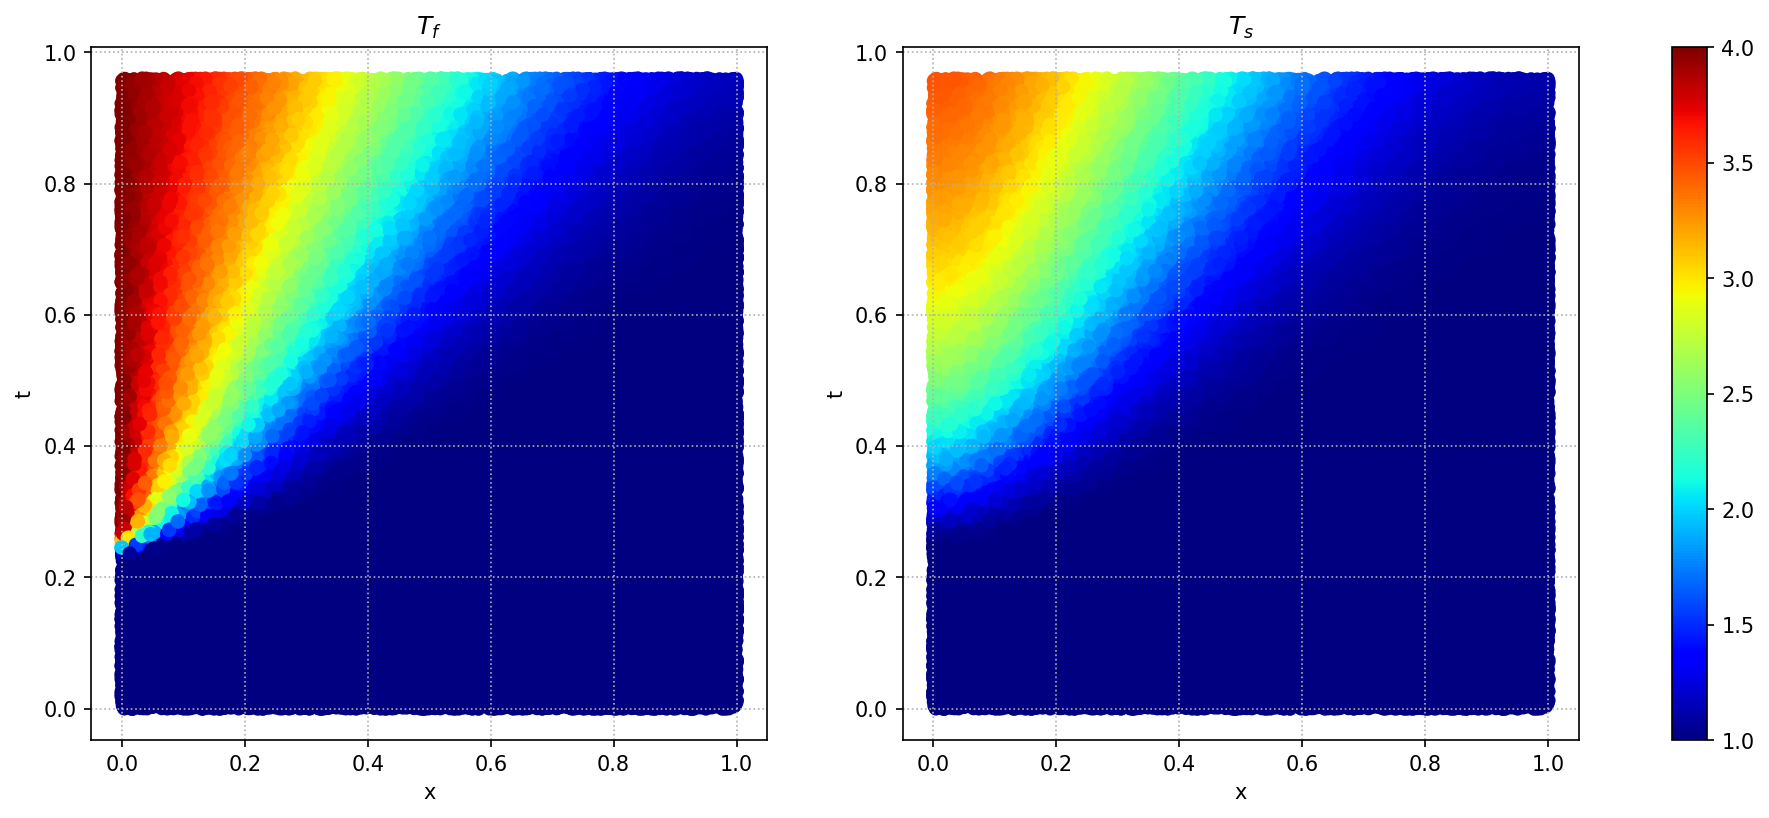

In [37]:
fig = pinn.plot(inputs, outputs)

In [38]:
fig.savefig('output.png')

In [22]:
results = torch.concat([inputs, outputs], dim=1)
results = results.detach().numpy()
results = pd.DataFrame(results, columns=['x', 't', 'tf', 'ts'])

In [26]:
results.to_csv('Task2.txt', index=False)